<a href="https://colab.research.google.com/github/sasumwen/housing_in_buenos_aires/blob/main/020_housing_in_buenos_aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


In [2]:
#this function does 4 parts, it selects properties specifically in capital federal, 
#and next the properties must be apartment only and 
#lastly it must be less that 400k
#and it removes outliers so that dataset is not too distant

#then the new DataFrame is assigned following these attributes
def wrangle(filepath):
  df =pd.read_csv(filepath, encoding="ISO-8859-1")
  
  #subset to properties in "Capital Federal"
  mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")

  #subset to "apartment"
  mask_apt = df["property_type"] == "apartment"

  #subset to less than 400,000
  mask_price = df["price_aprox_usd"] < 400_000

  #subset remove outliers by surface areas covered
  low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
  mask_area = df["surface_covered_in_m2"].between(low, high)


  df = df[mask_ba & mask_apt & mask_price & mask_area]


  return df

In [3]:
df = wrangle("/content/drive/MyDrive/colab_notebooks/020-housing_in_buenos_aires/buenos-aires-real-estate-1.csv")

In [4]:
df.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


In [5]:
assert (
    len(df) <= 8606
), f"'df' should have no more than 8606 observations, not {len(df)}."

Text(0.5, 1.0, 'Distribution of apartment sizes')

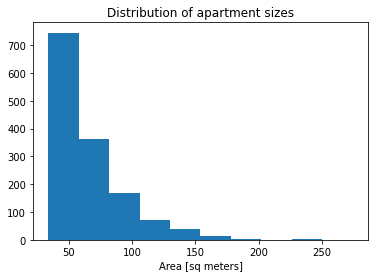

In [6]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of apartment sizes")

In [7]:
df.describe()["surface_covered_in_m2"]

count    1413.000000
mean       64.828733
std        30.411327
min        34.000000
25%        43.000000
50%        56.000000
75%        77.000000
max       274.000000
Name: surface_covered_in_m2, dtype: float64

Text(0.5, 1.0, 'BA: Price verses Area')

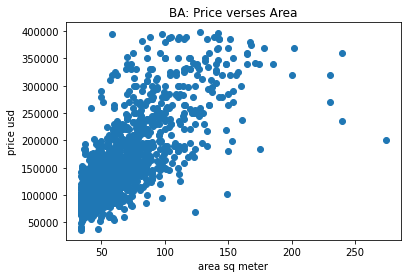

In [8]:
plt.scatter(x=df["surface_covered_in_m2"],
            y=df["price_aprox_usd"]
            )
plt.xlabel("area sq meter"),
plt.ylabel("price usd"),
plt.title("BA: Price verses Area")